In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset into the notebook
df=pd.read_csv('C:/Users/sarth/Downloads/credit_train_70 1.csv')
df.head()

,Loan_ID,Loan_Status,Current_Loan_Amount,Term,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,96b1b36c-2407-47ef-af1e-afa7d662d860,Fully Paid,519398,Long Term,10+ years,Home Mortgage,Debt Consolidation,35745.27,20.3,13,0,520505,1976040.0,0.0,0.0
1,0f1a01f1-4f4d-4516-bee0-6f94dae5778e,Charged Off,270798,Short Term,< 1 year,Rent,Debt Consolidation,13797.61,17.0,7,0,250857,386760.0,0.0,0.0
2,4a4bf5b2-95aa-48a8-9ed2-f69e56faeb4e,Fully Paid,207328,Short Term,< 1 year,Rent,Debt Consolidation,4704.40,16.7,4,0,268698,400422.0,0.0,0.0
3,98cdf293-0314-461a-91f1-e9beb7089f9f,Fully Paid,107844,Short Term,1 year,Rent,Debt Consolidation,11281.06,14.0,28,0,62472,413336.0,0.0,0.0
4,78a63170-8a34-4a80-b967-92cd8fd38492,Fully Paid,178816,Short Term,2 years,Rent,Debt Consolidation,11646.62,14.4,9,0,165547,312708.0,0.0,0.0


In [3]:
df.shape

(57399, 15)

In [4]:
df.dtypes

Loan_ID                       object
Loan_Status                   object
Current_Loan_Amount            int64
Term                          object
Years_in_current_job          object
Home_Ownership                object
Purpose                       object
Monthly_Debt                 float64
Years_of_Credit_History      float64
Number_of_Open_Accounts        int64
Number_of_Credit_Problems      int64
Current_Credit_Balance         int64
Maximum_Open_Credit          float64
Bankruptcies                 float64
Tax_Liens                    float64
dtype: object

In [5]:
df.describe()

,Current_Loan_Amount,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,5.739900e+04,57399.000000,57399.000000,57399.000000,57399.000000,5.739900e+04,5.739700e+04,57277.000000,57395.000000
mean,1.210297e+07,18359.912982,18.305664,11.118521,0.161937,2.938887e+05,8.085702e+05,0.114601,0.027772
std,3.219893e+07,12207.961855,7.032084,4.963434,0.471417,3.769251e+05,1.006575e+07,0.346880,0.252241
min,1.124200e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.793880e+05,10164.145000,13.500000,8.000000,0.000000,1.132115e+05,2.807420e+05,0.000000,0.000000
50%,3.081320e+05,16110.100000,17.000000,10.000000,0.000000,2.096650e+05,4.774000e+05,0.000000,0.000000
75%,5.193320e+05,23807.570000,21.800000,14.000000,0.000000,3.684670e+05,7.990620e+05,0.000000,0.000000
max,1.000000e+08,435843.280000,70.500000,76.000000,12.000000,3.287897e+07,1.539738e+09,6.000000,11.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57399 entries, 0 to 57398
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_ID                    57399 non-null  object 
 1   Loan_Status                57399 non-null  object 
 2   Current_Loan_Amount        57399 non-null  int64  
 3   Term                       57399 non-null  object 
 4   Years_in_current_job       54944 non-null  object 
 5   Home_Ownership             57399 non-null  object 
 6   Purpose                    57399 non-null  object 
 7   Monthly_Debt               57399 non-null  float64
 8   Years_of_Credit_History    57399 non-null  float64
 9   Number_of_Open_Accounts    57399 non-null  int64  
 10  Number_of_Credit_Problems  57399 non-null  int64  
 11  Current_Credit_Balance     57399 non-null  int64  
 12  Maximum_Open_Credit        57397 non-null  float64
 13  Bankruptcies               57277 non-null  flo

In [7]:
features_with_na= [feature for feature in df.columns if df[feature].isnull().sum()>0]

In [8]:
features_with_na

['Years_in_current_job', 'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']

In [9]:
df.Years_in_current_job.isnull().sum()

2455

In [10]:
df.Maximum_Open_Credit.isnull().sum()

2

In [11]:
df.Bankruptcies.isnull().sum()

122

In [12]:
df.Tax_Liens.isnull().sum()

4

In [13]:
df.Loan_Status.value_counts()

Loan_Status
Fully Paid     41497
Charged Off    15902
Name: count, dtype: int64

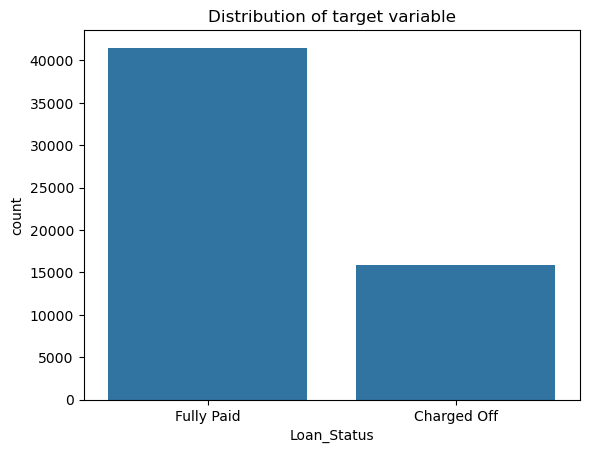

In [14]:
sns.countplot(x='Loan_Status',data=df)
plt.title('Distribution of target variable')
plt.show()

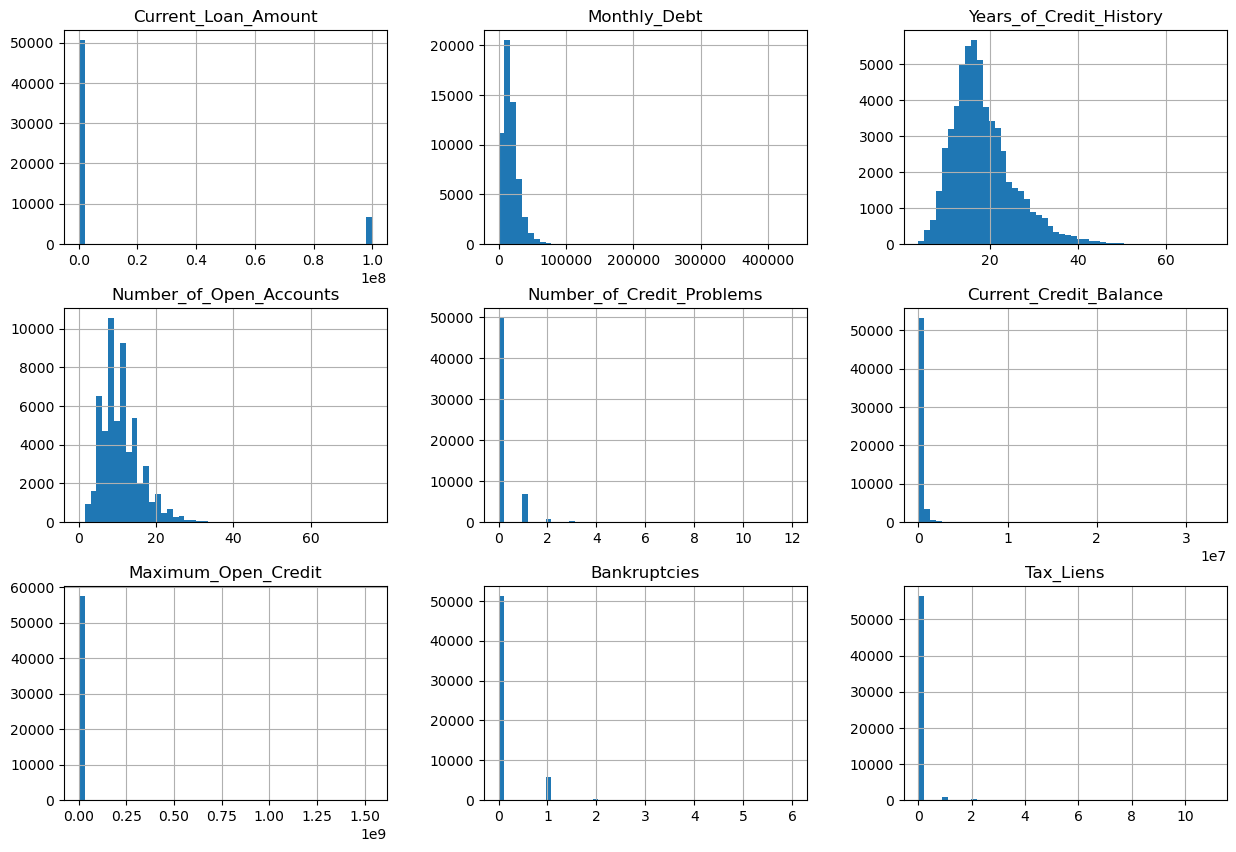

In [15]:
# Histograms of numerical features
df.hist(bins=50, figsize=(15, 10))
plt.show()

In [16]:
#Conclusions: 1)Graph of Years_of_Credit_history is in the form of normal distribution
# 2) In the graph of Current_Loan_Amount the values are at the extreme points of the plot, indicating higher probability of outliers
# 3)Number_of_Open_Accounts is in the form of normal distribution.
# 4) Other major numerical columns like Bankruptcies, Tax_Liens,Maximum_Open_Credit,etc have majority(or almost all) values as 0.

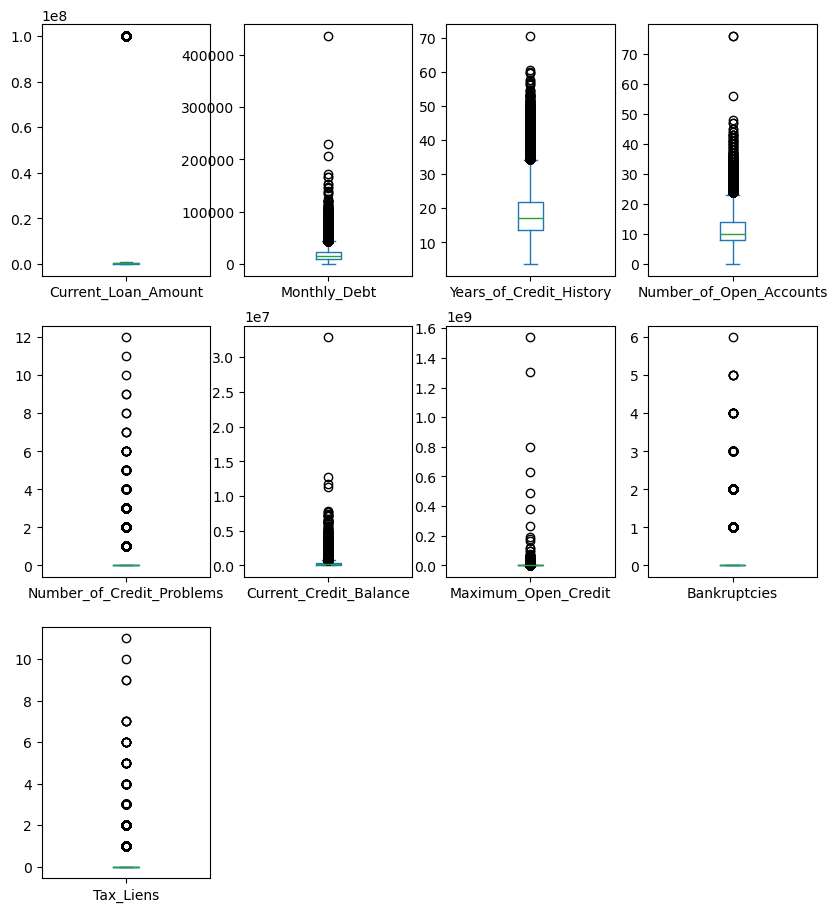

In [17]:
#Box plot to check for outliers
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,15))
plt.show()

In [18]:
#Conclusions from the boxplots: 1)The boxplot is not important for the columns where the median is 0 as almost all values are 0 in it and other greater than 0 are important for consideration
# 2)There are many outlier as predicted in Current_Loan_Amount
# 3)There are many outliers in Monthly_Debt,Years_of_Credit_History and Number_of_Open_Accounts.

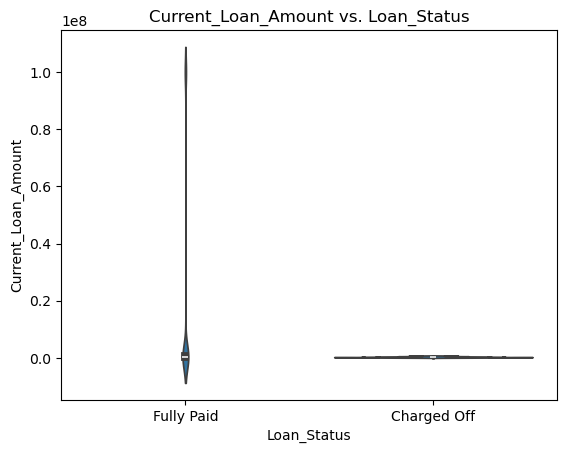

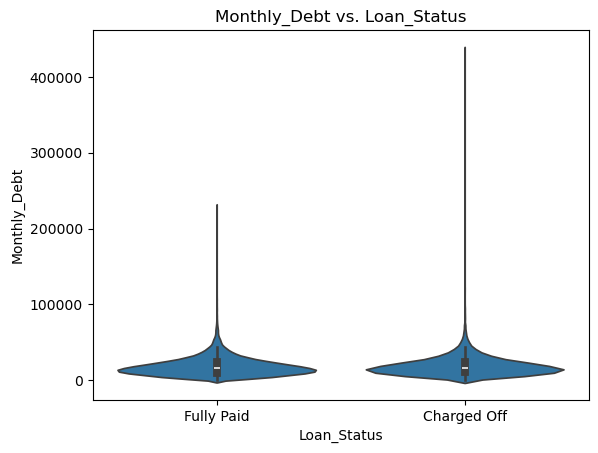

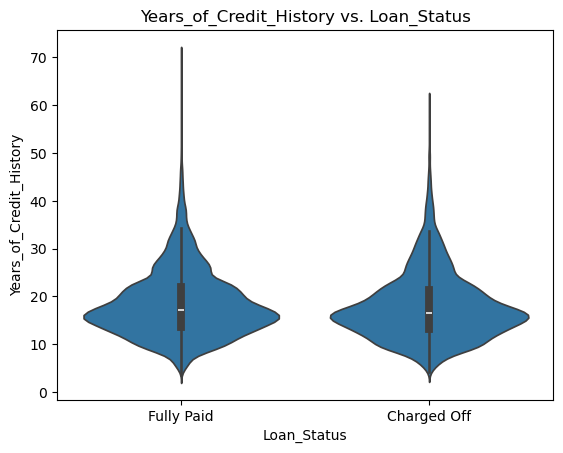

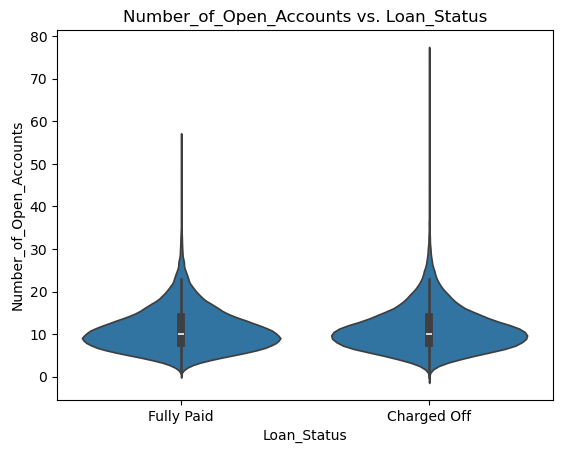

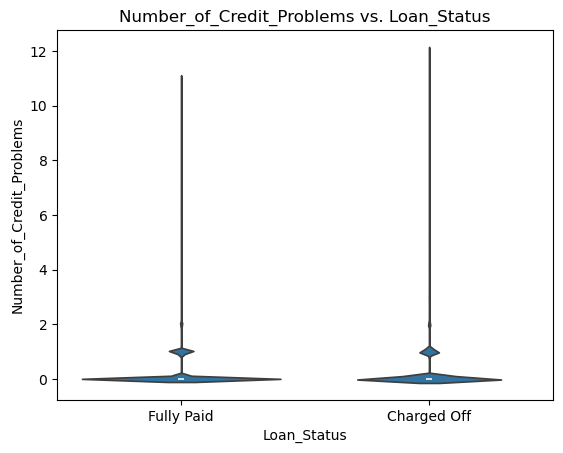

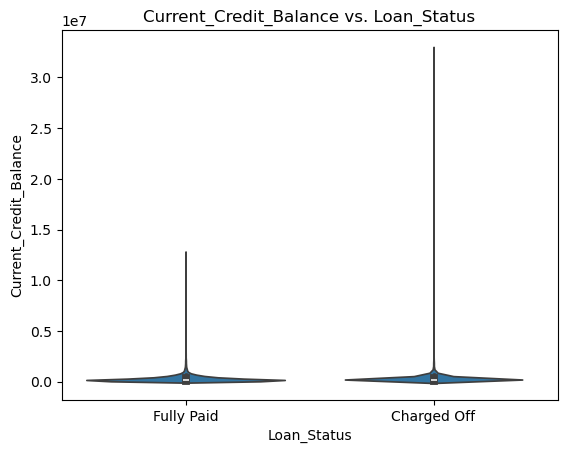

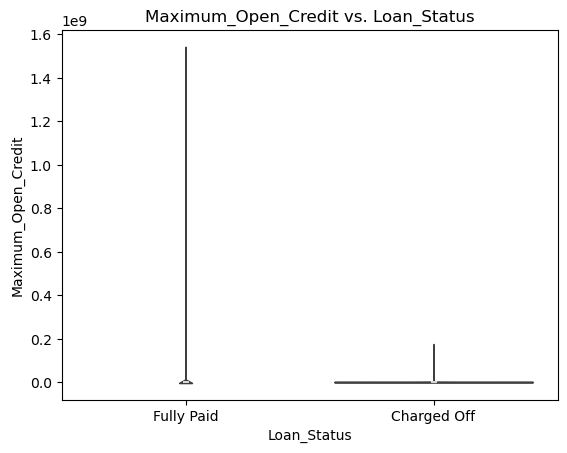

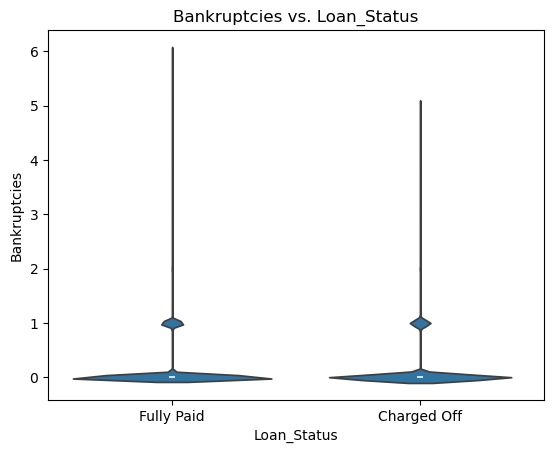

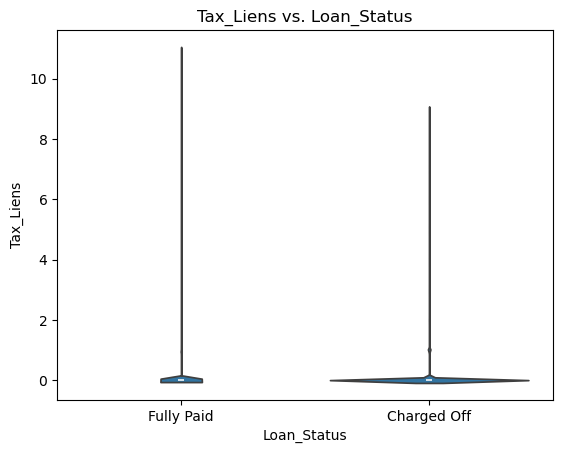

In [19]:
# Violin plots of numerical features against the target variable
for col in df.select_dtypes(include=['number']).columns:
    sns.violinplot(x='Loan_Status', y=col, data=df)
    plt.title(f'{col} vs. Loan_Status')
    plt.show()


In [20]:
#Conclusions: 1) Maximum_Open_Credit is mostly 0 for the loans which are charged off
#2) Tax_Liens is majorly 0 for the loans which are charged off.
# 3)Monthly debt vs Loan_Status, Years_of_credit_history vs Loan Status are almost equally divided among fully paid and charged off
# 4) The same is for Number_of_Open_Accounts vs Loan_Status

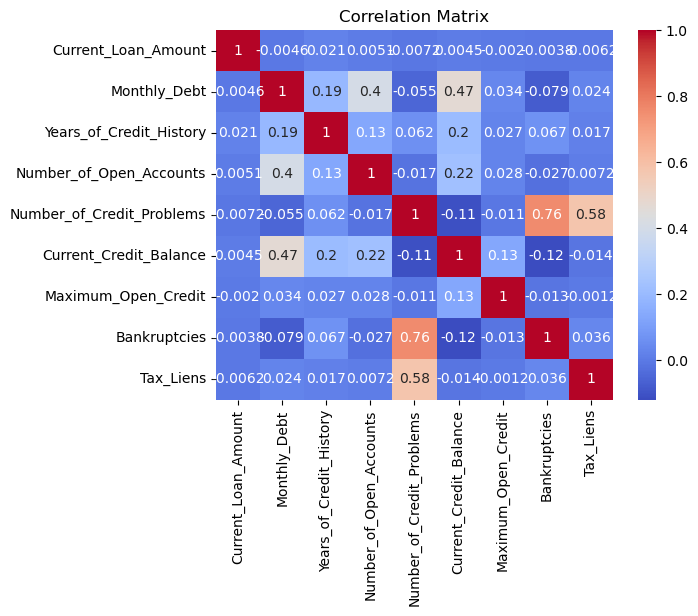

In [21]:
# Correlation matrix
numeric_df=df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [22]:
#Conclusion: From the given correlation matrix we can say that there is highly positive correlation between 
# Number_of_Credit_problems and Bankruptcies.
#There is a slight correlation between Number_of_Credit_Problems and Tax_Liens

In [24]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


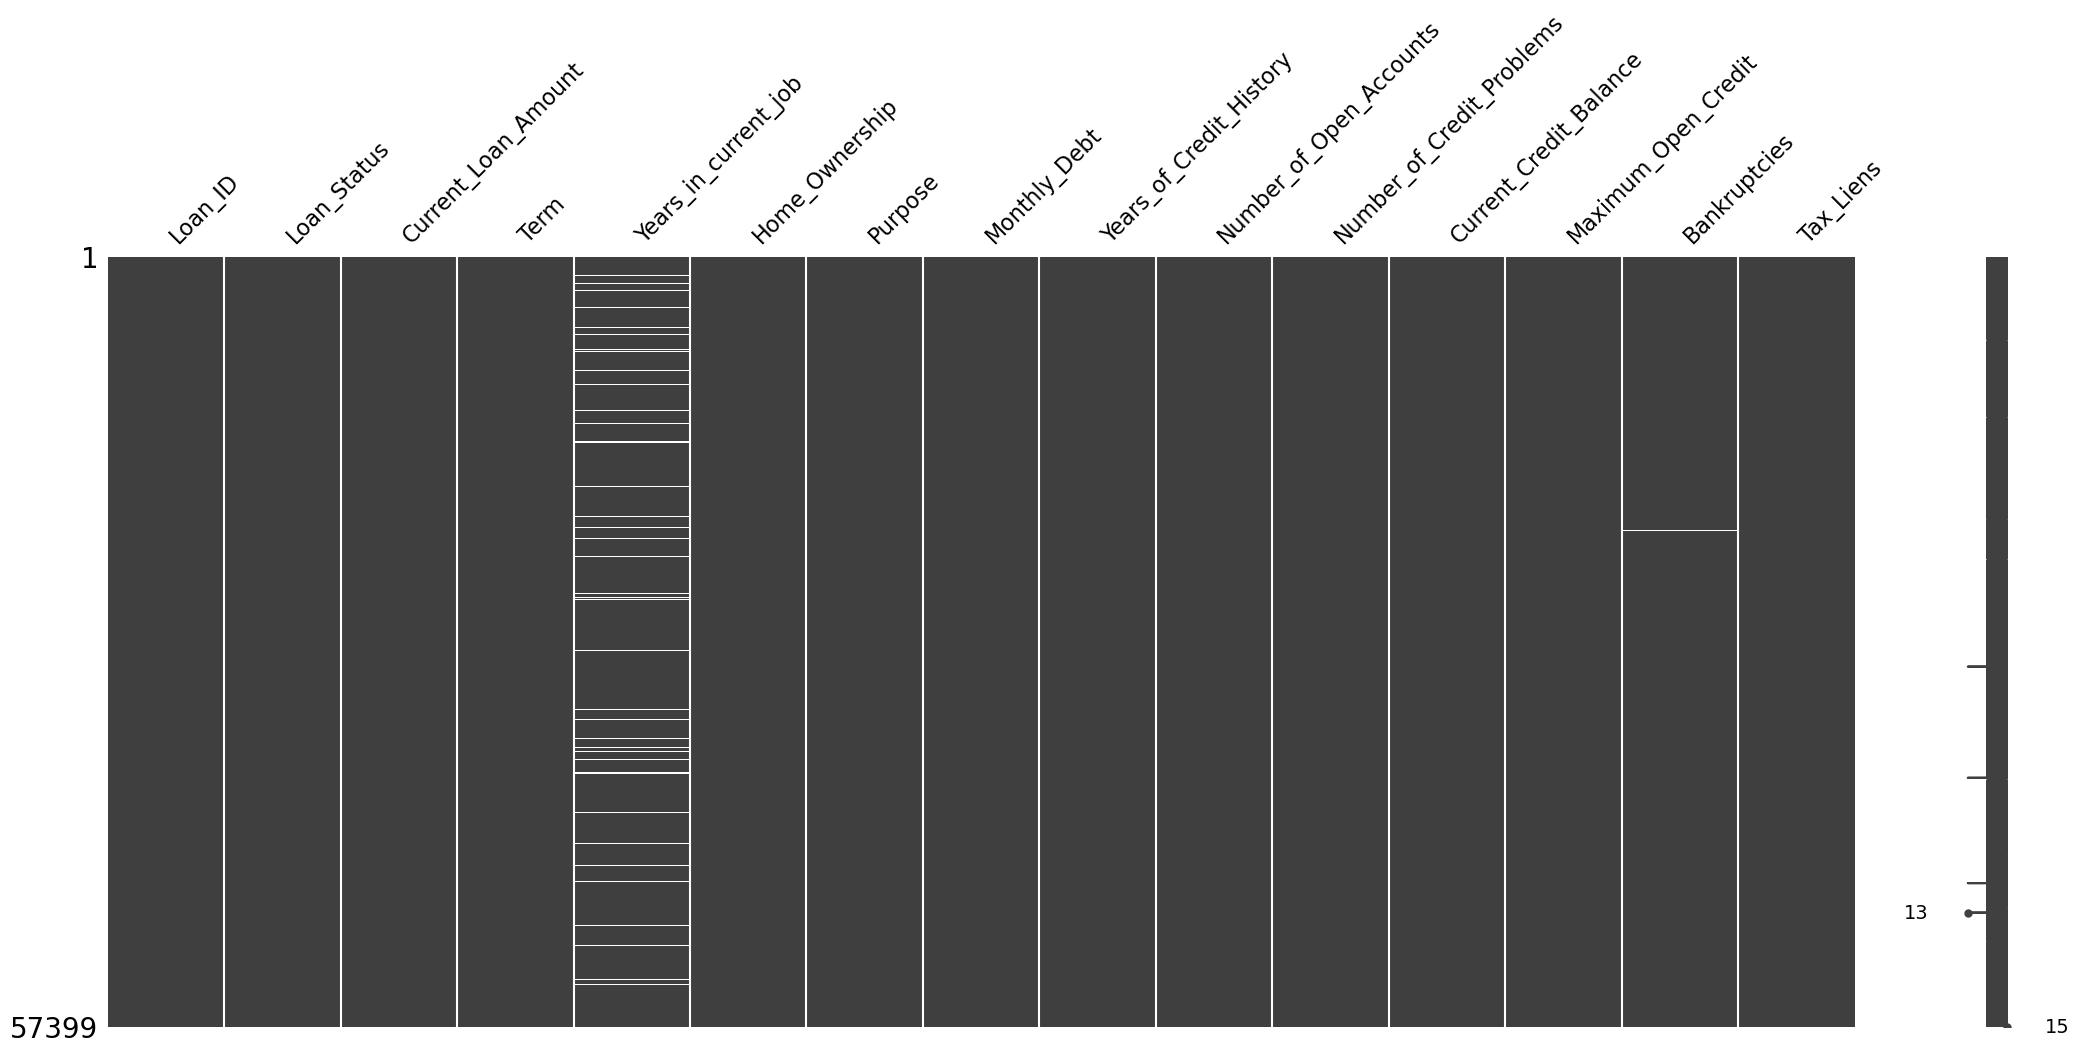

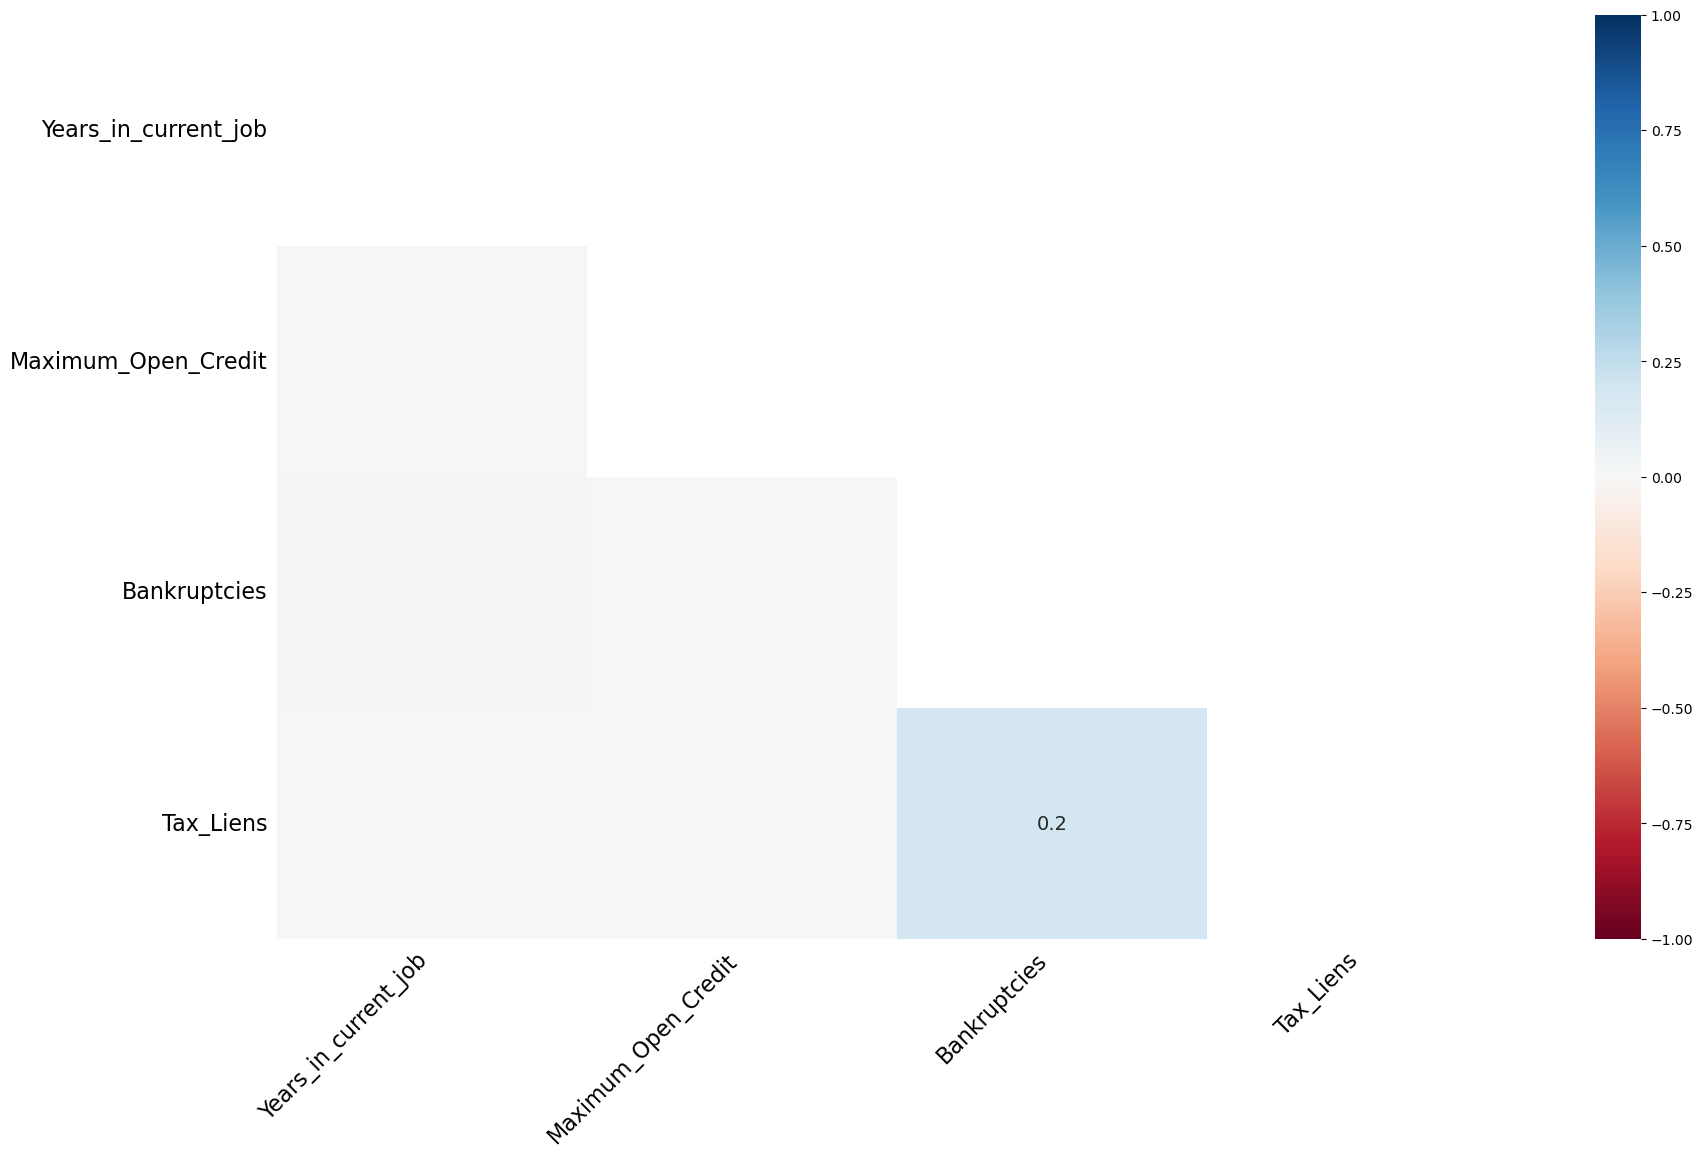

In [25]:
import missingno as msno

msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()

In [26]:
# Using Z-score
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=1)
print(f"Number of outliers: {np.sum(outliers)}")


Number of outliers: 3703


In [27]:
mode_value=df['Years_in_current_job'].mode()[0]
mode_value

'10+ years'

In [28]:
df['Years_in_current_job'].fillna(mode_value,inplace=True)

C:\Users\sarth\AppData\Local\Temp\ipykernel_27924\910119495.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Years_in_current_job'].fillna(mode_value,inplace=True)


In [29]:
median_value = df['Bankruptcies'].median()
df['Bankruptcies'].fillna(median_value, inplace=True)
df['Bankruptcies'] = pd.to_numeric(df['Bankruptcies'], errors='coerce')
df['Bankruptcies'] = df['Bankruptcies'].astype('float64')

C:\Users\sarth\AppData\Local\Temp\ipykernel_27924\98407700.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bankruptcies'].fillna(median_value, inplace=True)


In [30]:
df['Tax_Liens'].fillna(df['Tax_Liens'].median(),inplace=True)

C:\Users\sarth\AppData\Local\Temp\ipykernel_27924\349784906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tax_Liens'].fillna(df['Tax_Liens'].median(),inplace=True)


In [31]:
df['Maximum_Open_Credit'].fillna(df['Maximum_Open_Credit'].mean(),inplace=True)
df.isnull().sum()

C:\Users\sarth\AppData\Local\Temp\ipykernel_27924\1166562074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Maximum_Open_Credit'].fillna(df['Maximum_Open_Credit'].mean(),inplace=True)


Loan_ID                      0
Loan_Status                  0
Current_Loan_Amount          0
Term                         0
Years_in_current_job         0
Home_Ownership               0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
Tax_Liens                    0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()
df['Loan_Status_encoded'] = le.fit_transform(df['Loan_Status'])

In [34]:
df

,Loan_ID,Loan_Status,Current_Loan_Amount,Term,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status_encoded
0,96b1b36c-2407-47ef-af1e-afa7d662d860,Fully Paid,519398,Long Term,10+ years,Home Mortgage,Debt Consolidation,35745.27,20.3,13,0,520505,1976040.0,0.0,0.0,1
1,0f1a01f1-4f4d-4516-bee0-6f94dae5778e,Charged Off,270798,Short Term,< 1 year,Rent,Debt Consolidation,13797.61,17.0,7,0,250857,386760.0,0.0,0.0,0
2,4a4bf5b2-95aa-48a8-9ed2-f69e56faeb4e,Fully Paid,207328,Short Term,< 1 year,Rent,Debt Consolidation,4704.40,16.7,4,0,268698,400422.0,0.0,0.0,1
3,98cdf293-0314-461a-91f1-e9beb7089f9f,Fully Paid,107844,Short Term,1 year,Rent,Debt Consolidation,11281.06,14.0,28,0,62472,413336.0,0.0,0.0,1
4,78a63170-8a34-4a80-b967-92cd8fd38492,Fully Paid,178816,Short Term,2 years,Rent,Debt Consolidation,11646.62,14.4,9,0,165547,312708.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57394,b9132e70-896f-4da0-af74-018f0242a9bc,Fully Paid,258060,Short Term,10+ years,Own Home,Debt Consolidation,20281.17,15.0,11,0,182324,324786.0,0.0,0.0,1
57395,66038ba1-1d65-4120-acb1-731f138df81e,Charged Off,220462,Short Term,10+ years,Rent,Debt Consolidation,36271.00,20.4,17,0,485925,1010130.0,0.0,0.0,0
57396,e50711dc-ba50-4a8b-9105-dd2d526fadbc,Fully Paid,223520,Short Term,10+ years,Rent,Debt Consolidation,17323.82,17.5,8,2,115577,219384.0,2.0,0.0,1
57397,d5f53eed-0ef0-40c8-b79c-7d3719a366b2,Fully Paid,64856,Short Term,10+ years,Home Mortgage,Home Improvements,15139.20,24.5,4,0,51813,69212.0,0.0,0.0,1


In [35]:
y=df['Loan_Status_encoded']
X=df.iloc[:,2:15]

In [36]:
categorical_variables= [feature for feature in X.columns if X[feature].dtypes=='object']
categorical_variables

['Term', 'Years_in_current_job', 'Home_Ownership', 'Purpose']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.33,random_state=2)

In [39]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
X_train[categorical_variables]=ordinal_encoder.fit_transform(X_train[categorical_variables])
X_val[categorical_variables]=ordinal_encoder.transform(X_val[categorical_variables])


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled

array([[-0.3727028 ,  0.58578795, -1.15217433, ..., -0.07717233,
        -0.33221378, -0.11127437],
       [-0.3627208 , -1.70710236,  0.10970081, ...,  0.00599058,
        -0.33221378, -0.11127437],
       [-0.35773255, -1.70710236, -0.83670555, ...,  0.04141202,
         2.54784604, -0.11127437],
       ...,
       [-0.36982169,  0.58578795, -0.83670555, ...,  0.03408017,
        -0.33221378, -0.11127437],
       [ 2.7448868 ,  0.58578795, -0.52123676, ..., -0.0743193 ,
         2.54784604, -0.11127437],
       [-0.35034623,  0.58578795, -0.83670555, ..., -0.07980895,
        -0.33221378, -0.11127437]])

In [42]:
X_val_scaled=scaler.transform(X_val)
X_val_scaled

array([[-0.35654003,  0.58578795, -0.83670555, ...,  0.14971383,
        -0.33221378, -0.11127437],
       [-0.36592234, -1.70710236,  1.05610717, ..., -0.02204886,
        -0.33221378, -0.11127437],
       [ 2.7448868 ,  0.58578795, -0.83670555, ..., -0.01268478,
         2.54784604, -0.11127437],
       ...,
       [ 2.7448868 ,  0.58578795,  0.74063838, ..., -0.01246573,
         2.54784604, -0.11127437],
       [-0.35952681, -1.70710236, -0.83670555, ...,  0.06964412,
        -0.33221378, -0.11127437],
       [-0.36588598,  0.58578795,  1.37157595, ...,  0.06698375,
        -0.33221378, -0.11127437]])

In [43]:
import scipy.stats as stat
import pylab

In [44]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

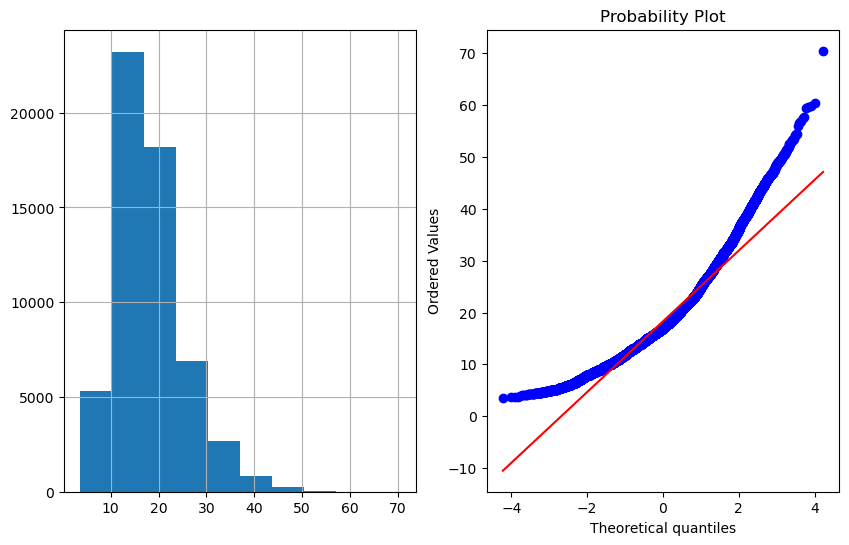

In [45]:
plot_data(df,'Years_of_Credit_History')

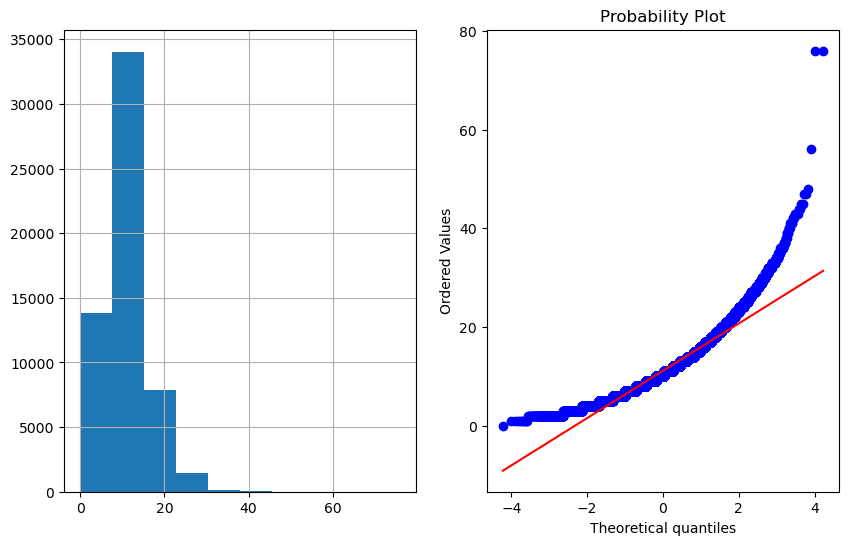

In [46]:
plot_data(df,'Number_of_Open_Accounts')

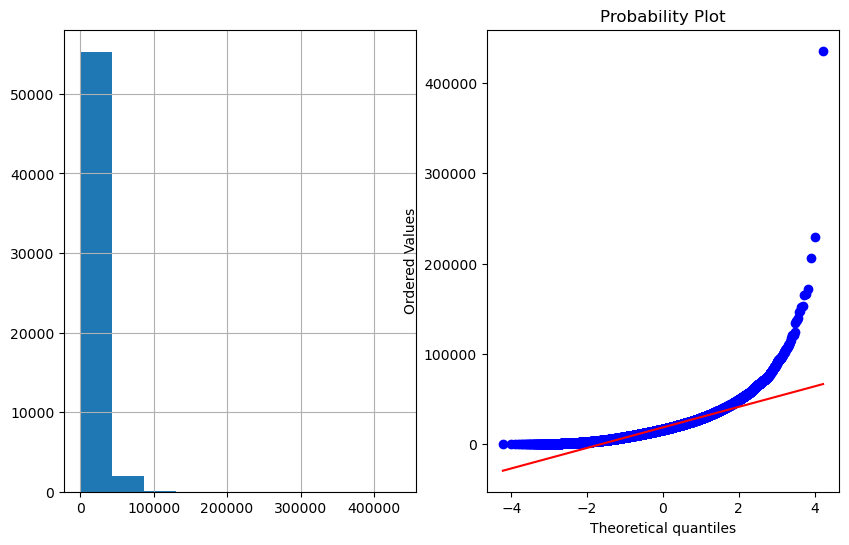

In [47]:
plot_data(df,'Monthly_Debt')

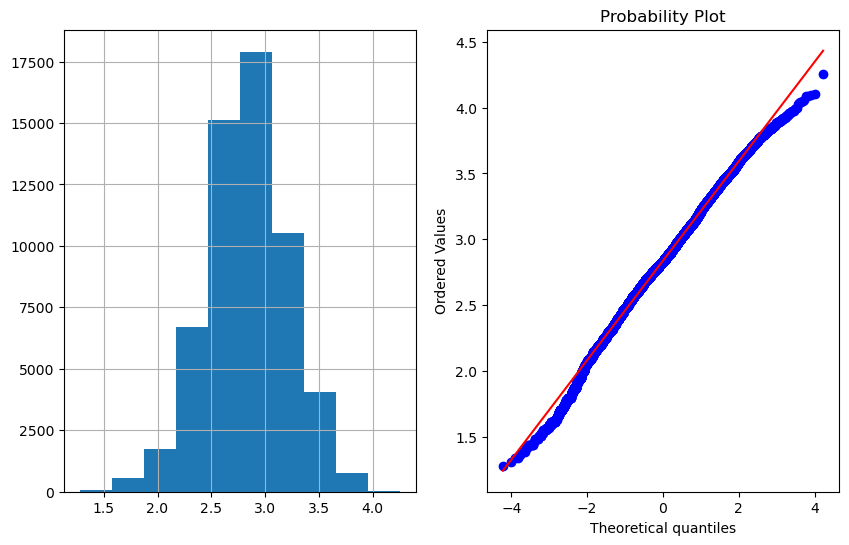

In [48]:
df['Years_of_Credit_History_log']=np.log(df['Years_of_Credit_History'])
plot_data(df,'Years_of_Credit_History_log')

In [49]:
df['Current_Loan_Amount_log'],parameters=stat.boxcox(df['Current_Loan_Amount'])
print(parameters)

-0.3806187897185441


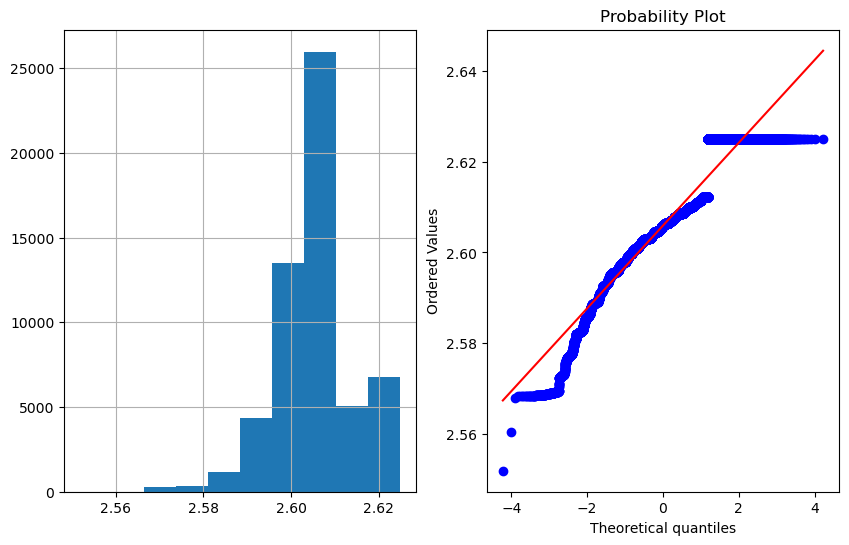

In [50]:
plot_data(df,'Current_Loan_Amount_log')

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score, confusion_matrix, classification_report

In [52]:
random_model=RandomForestClassifier(n_estimators=150,random_state=2)

In [53]:
random_model.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=150, random_state=2)

In [54]:
prediction=random_model.predict(X_val_scaled)

In [55]:
1-mean_absolute_error(y_val,prediction)

0.7169253510716925

In [56]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [57]:
y_pred=log_reg.predict(X_val_scaled)

In [58]:
accuracy=accuracy_score(y_val,y_pred)

In [59]:
accuracy

0.7237356139795165

In [60]:
f1=f1_score(y_val,y_pred)

In [61]:
f1

0.8361769401746861

In [62]:
conf_matrix = confusion_matrix(y_val, y_pred)

In [63]:
conf_matrix

array([[  354,  4893],
       [  340, 13355]], dtype=int64)

In [66]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.1/124.9 MB 1.8 MB/s eta 0:01:10
   ---------------------------------------- 0.3/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 0.8/124.9 MB 5.3 MB/s eta 0:00:24
    --------------------------------------- 1.6/124.9 MB 8.0 MB/s eta 0:00:16
    --------------------------------------- 2.0/124.9 MB 8.5 MB/s eta 0:00:15
    --------------------------------------- 2.8/124.9 MB 9.6 MB/s eta 0:00:13
   - -------------------------------------- 3.6/124.9 MB 10.3 MB/s eta 0:00:12
   - -------------------------------------- 4.2/124.9 MB 11.1 MB/s eta 0:00:11
   - -------------------------------------- 4.9/124.9 MB 11.7 MB/s eta 0:00:11
   - -------------------------------------- 5.3/124.9 MB 11.6 MB/s eta 0:00:11
   - -------------------------------------- 5.7/124.9 MB 11.4 MB/s 

In [67]:
from xgboost import XGBClassifier

In [68]:
grad_model=XGBClassifier(n_estimators=100)

In [69]:
grad_model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
grad_pred=grad_model.predict(X_val_scaled)

In [71]:
acc=accuracy_score(y_val,grad_pred)

In [72]:
acc

0.7163446309787773

In [73]:
f_1=f1_score(y_val,grad_pred)

In [74]:
f_1

0.8254102355808286

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn=KNeighborsClassifier(n_neighbors=7)

In [77]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=7)

In [78]:
knn_pred=knn.predict(X_val_scaled)

In [79]:
accu=accuracy_score(y_val,knn_pred)

In [80]:
accu

0.6913736669834231

In [81]:
f1_sc=f1_score(y_val,knn_pred)

In [82]:
f1_sc

0.8042196918955123

In [83]:
from sklearn.svm import SVC

In [84]:
svm_model=SVC(kernel='rbf',C=1.0,gamma='scale')

In [85]:
svm_model.fit(X_train_scaled,y_train)

SVC()

In [86]:
svm_pred=svm_model.predict(X_val_scaled)

In [87]:
accuracy=accuracy_score(y_val,svm_pred)

In [88]:
f1_scores=f1_score(y_val,svm_pred)

In [89]:
f1_scores

0.8362728265959107

In [ ]:
accuracy

0.7231021011508817

In [90]:
X_train_scaled

array([[-0.3727028 ,  0.58578795, -1.15217433, ..., -0.07717233,
        -0.33221378, -0.11127437],
       [-0.3627208 , -1.70710236,  0.10970081, ...,  0.00599058,
        -0.33221378, -0.11127437],
       [-0.35773255, -1.70710236, -0.83670555, ...,  0.04141202,
         2.54784604, -0.11127437],
       ...,
       [-0.36982169,  0.58578795, -0.83670555, ...,  0.03408017,
        -0.33221378, -0.11127437],
       [ 2.7448868 ,  0.58578795, -0.52123676, ..., -0.0743193 ,
         2.54784604, -0.11127437],
       [-0.35034623,  0.58578795, -0.83670555, ..., -0.07980895,
        -0.33221378, -0.11127437]])

In [91]:
numeric_features = ['Current_Loan_Amount','Monthly_Debt','Years_of_Credit_History','Number_of_Open_Accounts','Number_of_Credit_Problems','Current_Credit_Balance','Current_Credit_Balance','Bankruptcies','Tax_Liens']
ordinal_features = ['Term','Years_in_current_job','Home_Ownership','Purpose']

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [93]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [94]:
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

In [95]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features)
    ])

In [96]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('est', LogisticRegression())
])

In [97]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Current_Loan_Amount',
                                                   'Monthly_Debt',
                                                   'Years_of_Credit_History',
                                                   'Number_of_Open_Accounts',
                                                   'Number_of_Credit_Problems',
                                                   'Current_Credit_Balance',
                                                   'Current_Credit_Balance',
                                                   'Bankruptcies',
                                                   'Tax_Liens']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Term',
                                                   'Years_in_current_job',
                                                   'Home_Ownership',
                                                   'Purpose'])])),
                ('est', LogisticRegression())])

In [98]:
#Saving the model
from joblib import dump
from joblib import load


In [ ]:
model = joblib.dump(model,'model.joblib')